In [23]:
#Importing necessary libraries
import pandas as pd,numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
train = pd.read_csv('titanic_train.csv')

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
#checking missing data
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
train.shape

(891, 12)

In [28]:
# Percentage of missing values in cabin column
687*100/891

77.10437710437711

### Exploratory data analysis

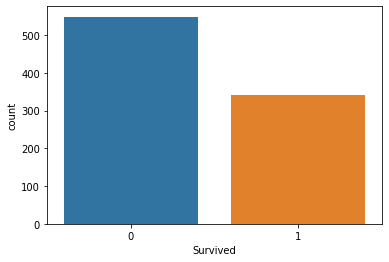

In [29]:
sns.countplot(x='Survived',data=train)
plt.show()

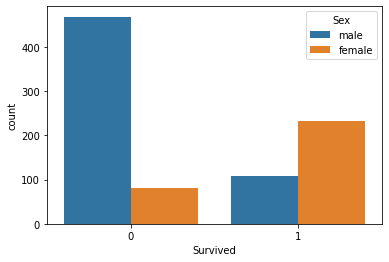

In [30]:
### Gender vs Survival rate
sns.countplot(x='Survived',hue='Sex',data=train)
plt.show()

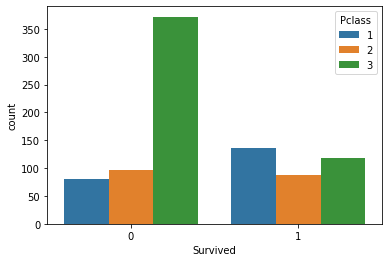

In [31]:
### Pclass vs Survival rate
sns.countplot(x='Survived',hue='Pclass',data=train)
plt.show()

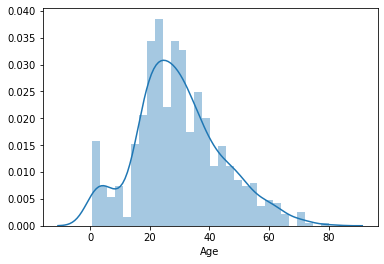

In [32]:
### Age Distribution
sns.distplot(train['Age'].dropna(),kde=True,bins=30)
plt.show()

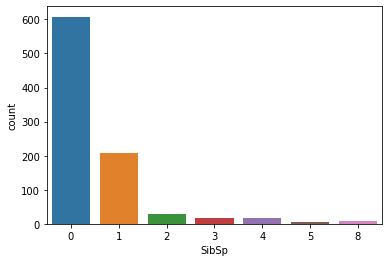

In [33]:
### Number of siblings/Spouses aboard the titanic
sns.countplot(x='SibSp',data=train)
plt.show()

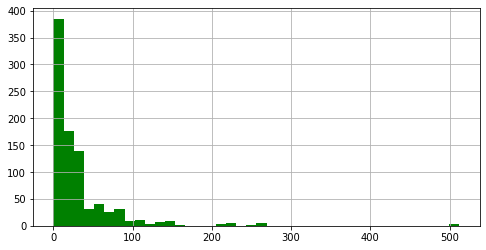

In [34]:
### Passenger Fare
train['Fare'].hist(color='green',bins=40,figsize=(8,4))
plt.show()

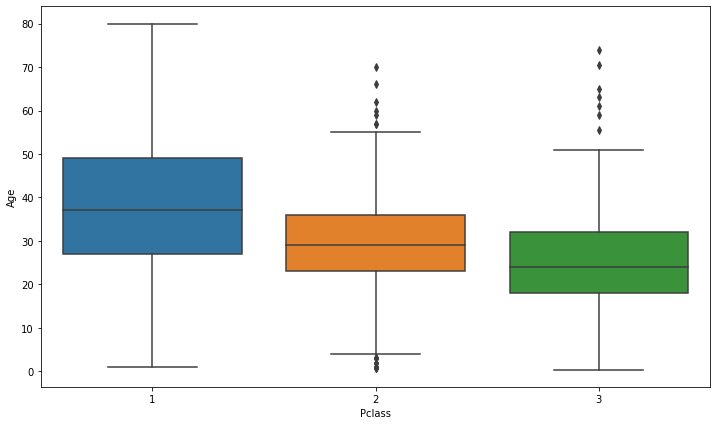

In [35]:
#Age vs Passenger class distribution
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train)
plt.show()

### Data Cleaning

In [36]:
# Function to fill the missing values of Age column
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if (pd.isnull(Age)):
        if(Pclass==1):
            return 37
        elif(Pclass==2):
            return 29
        else:
            return 24
    else:
        return Age   
    

In [37]:
train['Age']= train[['Age','Pclass']].apply(impute_age,axis=1)

In [38]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [39]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.066409,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.244532,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [40]:
train.drop('Cabin',axis=1,inplace=True)

In [41]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [42]:
# Filling missing values of embarked column with mode
train['Embarked']=train['Embarked'].fillna(train['Embarked'].mode()[0])

In [43]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [44]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [45]:
train = pd.concat([train,sex,embark],axis=1)

In [46]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [47]:
# Dropping un-necessary columns
train.drop(['Sex','Embarked','Name','Ticket','PassengerId'],axis=1,inplace=True)

In [48]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [49]:
#Train and test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train.drop('Survived',axis=1),train['Survived'],test_size=0.3,random_state=101)

### Building a logistic regression model

In [50]:
# Using sklearn library
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/Users/debasmitamohanty/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

### Fitting the logistic regression using stats model

In [51]:
import statsmodels.api as sm
logit_model = sm.Logit(y_train,X_train)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.475128
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  623
Model:                          Logit   Df Residuals:                      615
Method:                           MLE   Df Model:                            7
Date:                Wed, 25 Aug 2021   Pseudo R-squ.:                  0.2766
Time:                        22:13:08   Log-Likelihood:                -296.00
converged:                       True   LL-Null:                       -409.17
Covariance Type:            nonrobust   LLR p-value:                 2.982e-45
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass         0.0497      0.101      0.490      0.624      -0.149       0.249
Age            0.0044      0.

In [63]:
train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

In [64]:
import statsmodels.api as sm
logit_model = sm.Logit(y_train,X_train)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.475128
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  623
Model:                          Logit   Df Residuals:                      615
Method:                           MLE   Df Model:                            7
Date:                Thu, 26 Aug 2021   Pseudo R-squ.:                  0.2766
Time:                        20:08:48   Log-Likelihood:                -296.00
converged:                       True   LL-Null:                       -409.17
Covariance Type:            nonrobust   LLR p-value:                 2.982e-45
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass         0.0497      0.101      0.490      0.624      -0.149       0.249
Age            0.0044      0.

In [65]:
result.params

Pclass    0.049686
Age       0.004371
SibSp    -0.278993
Parch    -0.151171
Fare      0.020584
male     -2.409216
Q         0.253512
S         0.172282
dtype: float64

# Checking VIF

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features']= X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,Pclass,6.27
7,S,4.77
1,Age,4.66
5,male,3.16
4,Fare,1.86
3,Parch,1.65
2,SibSp,1.64
6,Q,1.55


In [70]:
X_train = X_train.drop('Pclass',axis=1)

In [71]:
import statsmodels.api as sm
logit_model = sm.Logit(y_train,X_train)
result_2 = logit_model.fit()
print(result_2.summary())

Optimization terminated successfully.
         Current function value: 0.475321
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  623
Model:                          Logit   Df Residuals:                      616
Method:                           MLE   Df Model:                            6
Date:                Thu, 26 Aug 2021   Pseudo R-squ.:                  0.2763
Time:                        20:49:53   Log-Likelihood:                -296.12
converged:                       True   LL-Null:                       -409.17
Covariance Type:            nonrobust   LLR p-value:                 5.218e-46
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age            0.0054      0.007      0.785      0.433      -0.008       0.019
SibSp         -0.2672      0.

In [72]:
X_train = X_train.drop('Age',axis=1)

In [73]:
import statsmodels.api as sm
logit_model = sm.Logit(y_train,X_train)
result_3 = logit_model.fit()
print(result_3.summary())

Optimization terminated successfully.
         Current function value: 0.475813
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  623
Model:                          Logit   Df Residuals:                      617
Method:                           MLE   Df Model:                            5
Date:                Thu, 26 Aug 2021   Pseudo R-squ.:                  0.2755
Time:                        20:51:33   Log-Likelihood:                -296.43
converged:                       True   LL-Null:                       -409.17
Covariance Type:            nonrobust   LLR p-value:                 9.950e-47
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
SibSp         -0.2826      0.107     -2.650      0.008      -0.492      -0.074
Parch         -0.1337      0.

In [74]:
X_train= X_train.drop('Parch', axis = 1)

In [75]:
import statsmodels.api as sm
logit_model = sm.Logit(y_train,X_train)
result_4 = logit_model.fit()
print(result_4.summary())

Optimization terminated successfully.
         Current function value: 0.476669
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  623
Model:                          Logit   Df Residuals:                      618
Method:                           MLE   Df Model:                            4
Date:                Thu, 26 Aug 2021   Pseudo R-squ.:                  0.2742
Time:                        20:53:22   Log-Likelihood:                -296.97
converged:                       True   LL-Null:                       -409.17
Covariance Type:            nonrobust   LLR p-value:                 2.104e-47
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
SibSp         -0.3133      0.103     -3.047      0.002      -0.515      -0.112
Fare           0.0205      0.

In [76]:
X_train = X_train.drop('Q', axis = 1)

In [77]:
import statsmodels.api as sm
logit_model = sm.Logit(y_train,X_train)
result_5 = logit_model.fit()
print(result_5.summary())

Optimization terminated successfully.
         Current function value: 0.477977
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  623
Model:                          Logit   Df Residuals:                      619
Method:                           MLE   Df Model:                            3
Date:                Thu, 26 Aug 2021   Pseudo R-squ.:                  0.2722
Time:                        20:54:56   Log-Likelihood:                -297.78
converged:                       True   LL-Null:                       -409.17
Covariance Type:            nonrobust   LLR p-value:                 5.023e-48
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
SibSp         -0.3023      0.102     -2.970      0.003      -0.502      -0.103
Fare           0.0207      0.

In [78]:
X_train = X_train.drop('S',axis = 1)
logit_model = sm.Logit(y_train,X_train)
result_6 = logit_model.fit()
print(result_6.summary())

Optimization terminated successfully.
         Current function value: 0.479839
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  623
Model:                          Logit   Df Residuals:                      620
Method:                           MLE   Df Model:                            2
Date:                Thu, 26 Aug 2021   Pseudo R-squ.:                  0.2694
Time:                        20:56:02   Log-Likelihood:                -298.94
converged:                       True   LL-Null:                       -409.17
Covariance Type:            nonrobust   LLR p-value:                 1.339e-48
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
SibSp         -0.2587      0.095     -2.716      0.007      -0.445      -0.072
Fare           0.0217      0.

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features']= X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,Fare,1.29
0,SibSp,1.23
2,male,1.20


In [52]:
predictions = logmodel.predict(X_test)

In [53]:
# Finding the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.7910447761194029

### Model Evaluation

- We have to check Precision, Recall and F1-Score using classification report
- We can see the confusion matrix
- We can plot AUC-ROC Curve

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       154
           1       0.80      0.68      0.73       114

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



In [55]:
### Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[135,  19],
       [ 37,  77]])

In [56]:
(135+76)/(135+19+38+76)

0.7873134328358209

### AUC-ROC Curve

In [57]:
prob = logmodel.predict_proba(X_test)

In [58]:
prob

array([[0.69040924, 0.30959076],
       [0.02263494, 0.97736506],
       [0.48026198, 0.51973802],
       [0.82339324, 0.17660676],
       [0.79211956, 0.20788044],
       [0.95018205, 0.04981795],
       [0.6102437 , 0.3897563 ],
       [0.89357943, 0.10642057],
       [0.12448613, 0.87551387],
       [0.37470389, 0.62529611],
       [0.79211956, 0.20788044],
       [0.92671629, 0.07328371],
       [0.28182482, 0.71817518],
       [0.90137033, 0.09862967],
       [0.90110248, 0.09889752],
       [0.95157775, 0.04842225],
       [0.40396175, 0.59603825],
       [0.87216159, 0.12783841],
       [0.85798781, 0.14201219],
       [0.21587471, 0.78412529],
       [0.9346076 , 0.0653924 ],
       [0.94573264, 0.05426736],
       [0.31458248, 0.68541752],
       [0.36723201, 0.63276799],
       [0.95881804, 0.04118196],
       [0.80268235, 0.19731765],
       [0.86728895, 0.13271105],
       [0.75837251, 0.24162749],
       [0.90292226, 0.09707774],
       [0.94838779, 0.05161221],
       [0.

In [59]:
from sklearn.metrics import roc_curve,roc_auc_score
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [60]:
fpr,tpr,thresholds = roc_curve(y_test,prob[:,1],drop_intermediate=False)

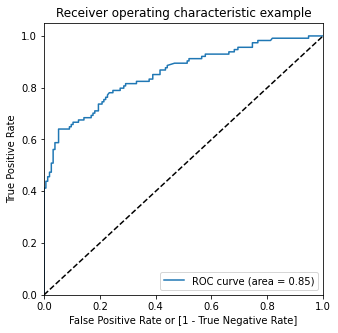

In [61]:
draw_roc(y_test,prob[:,1])

In [62]:
prob[:,1]

array([0.30959076, 0.97736506, 0.51973802, 0.17660676, 0.20788044,
       0.04981795, 0.3897563 , 0.10642057, 0.87551387, 0.62529611,
       0.20788044, 0.07328371, 0.71817518, 0.09862967, 0.09889752,
       0.04842225, 0.59603825, 0.12783841, 0.14201219, 0.78412529,
       0.0653924 , 0.05426736, 0.68541752, 0.63276799, 0.04118196,
       0.19731765, 0.13271105, 0.24162749, 0.09707774, 0.05161221,
       0.80154479, 0.84303004, 0.6854275 , 0.08647079, 0.09961678,
       0.95067298, 0.07886336, 0.04616171, 0.10720887, 0.43815048,
       0.70870797, 0.62529611, 0.88741248, 0.34309738, 0.15456893,
       0.39019663, 0.04906346, 0.31243224, 0.06289966, 0.20788044,
       0.79669313, 0.26326423, 0.74489928, 0.6614667 , 0.6854275 ,
       0.09883829, 0.1488642 , 0.12720517, 0.30212851, 0.93627297,
       0.93207662, 0.11717405, 0.03493398, 0.58947212, 0.05171567,
       0.25259212, 0.83971789, 0.56502858, 0.61399293, 0.38617443,
       0.58827033, 0.13878265, 0.13395749, 0.11858779, 0.53998